In [58]:
import pandas as pd

df_avg = pd.read_csv("wteam_avg.csv")
df_qf  = pd.read_csv("quaterfinals.csv")

avg_sel = (
    df_avg
    .loc[df_avg["Team"].isin(["England", "Sweden"]), ["Team","Goals", "Shots", "ShotsOnTarget",
                                                    "xG", "BigChances", "Possession(%)", "Passes(%)",
                                                    "Fouls", "Tackles(%)", "Clearances", "Interceptions",
                                                    "ErrorsLeadingtoShot", "ErrorsLeadingtoGoal",
                                                    "Coner", "Yellow", "Red", "Saves", "xGOTFaced",
                                                    "GoalsPrevented"]]
        .rename(columns={"Possession(%)": "Possession", "Passes(%)": "Passes", "Tackles(%)": "Tackles"
                        , "ShotsOnTarget": "Shots on Target", "ErrorsLeadingtoShot": "Errors Leading to Shot",
                        "ErrorsLeadingtoGoal": "Errors Leading to Goal", "Coner": "Coner Kick"
                        , "Yellow": "Yellow Card", "Red": "Red Card", "xGOTFaced": "xGOT Faced", "GoalsPrevented": "Goals Prevented",
                         "BigChanced": "Big Chance"
                        })
    .assign(Stage="Group")
)

# -----------------------------
# 3) 8강 경기 데이터 추출
# -----------------------------
# Round가 Quaterfinals 이고 Italy 또는 Norway가 HomeTeam 또는 AwayTeam인 경기 필터링
qf_filtered = df_qf[
    (df_qf["Round"] == "Quaterfinals") &
    (
        (df_qf["HomeTeam"].isin(["England", "Sweden"])) |
        (df_qf["AwayTeam"].isin(["England", "Sweden"]))
    )
]

qf_rows = []
for _, row in qf_filtered.iterrows():
    if row["HomeTeam"] in ["England", "Sweden"]:
        qf_rows.append({
            "Stage": "Quarterfinal",
            "Team": row["HomeTeam"],
            "Goals": row["HomeGoals"],
            "Shots": row["HomeShots"],
            "Shots on Target": row["HomeShotsOnTarget"],
            "xG": row["HomexG"],
            "BigChances": row["HomeBigChances"],
            "Possession": row["HomePossession(%)"],
            "Passes": row["HomePasses(%)"],
            "Fouls": row["HomeFouls"],
            "Tackles": row["HomeTackles(%)"],
            "Clearances": row["HomeClearances"],
            "Interceptions": row["HomeInterceptions"],
            "Errors Leading to Shot": row["HomeErrorsLeadingtoShot"],
            "Errors Leading to Goal": row["HomeErrorsLeadingtoGoal"],
            "Coner Kick": row["HomeConer"],
            "Yellow Card": row["HomeYellow"],
            "Red Card": row["HomeRed"],
            "Saves": row["HomeSaves"],
            "xGOT Faced": row["HxGOTfaced"],
            "Goals Prevented": row["HGoalsprevented"]
        })
    if row["AwayTeam"] in ["England", "Sweden"]:
        qf_rows.append({
            "Stage": "Quarterfinal",
            "Team": row["AwayTeam"],
            "Goals": row["AwayGoals"],
            "Shots": row["AwayShots"],
            "Shots on Target": row["AwayShotsOnTarget"],
            "xG": row["AwayxG"],
            "BigChances": row["AwayBigChances"],
            "Possession": row["AwayPossession(%)"],
            "Passes": row["AwayPasses(%)"],
            "Fouls": row["AwayFouls"],
            "Tackles": row["AwayTackles(%)"],
            "Clearances": row["AwayClearances"],
            "Interceptions": row["AwayInterceptions"],
            "Errors Leading to Shot": row["AwayErrorsLeadingtoShot"],
            "Errors Leading to Goal": row["AwayErrorsLeadingtoGoal"],
            "Coner Kick": row["AwayConer"],
            "Yellow Card": row["AwayYellow"],
            "Red Card": row["AwayRed"],
            "Saves": row["AwaySaves"],
            "xGOT Faced": row["AxGOTfaced"],
            "Goals Prevented": row["AGoalsprevented"]
        })

qf_sel = pd.DataFrame(qf_rows)

tidy_df = pd.concat([avg_sel, qf_sel], ignore_index=True)

# concat 이후 tidy_df에서 숫자형으로 변환할 수 있는 컬럼 전부 처리
for col in tidy_df.columns:
    if col != "Team" and col != "Stage":  # 문자형 제외
        tidy_df[col] = pd.to_numeric(tidy_df[col], errors="coerce")

# 소수점 2자리로 반올림
tidy_df = tidy_df.round(2)

first_cols = ["Stage", "Team"]
other_cols = [c for c in tidy_df.columns if c not in first_cols]
tidy_df = tidy_df[first_cols + other_cols]

print(tidy_df)

# 2) CSV 저장 (index=True 기본값)
tidy_df.to_csv("den_eng.csv", index=False)


          Stage     Team  Goals  Shots  Shots on Target    xG  BigChances  \
0         Group  England   3.67  17.67             6.33  3.05        5.67   
1         Group   Sweden   2.67  18.00             5.67  2.87        4.33   
2  Quarterfinal   Sweden   2.00  14.00             7.00  2.04        3.00   
3  Quarterfinal  England   2.00  18.00             4.00  2.50        3.00   

   Possession  Passes  Fouls  ...  Clearances  Interceptions  \
0       62.00   84.00   7.67  ...       18.67            6.0   
1       53.33   77.33  11.67  ...       19.33            7.0   
2       40.00   59.00  15.00  ...       50.00           11.0   
3       60.00   74.00  18.00  ...       32.00            7.0   

   Errors Leading to Shot  Errors Leading to Goal  Coner Kick  Yellow Card  \
0                    1.00                    0.33        5.33         0.33   
1                    0.33                    0.00        7.00         0.33   
2                    1.00                    1.00        6.

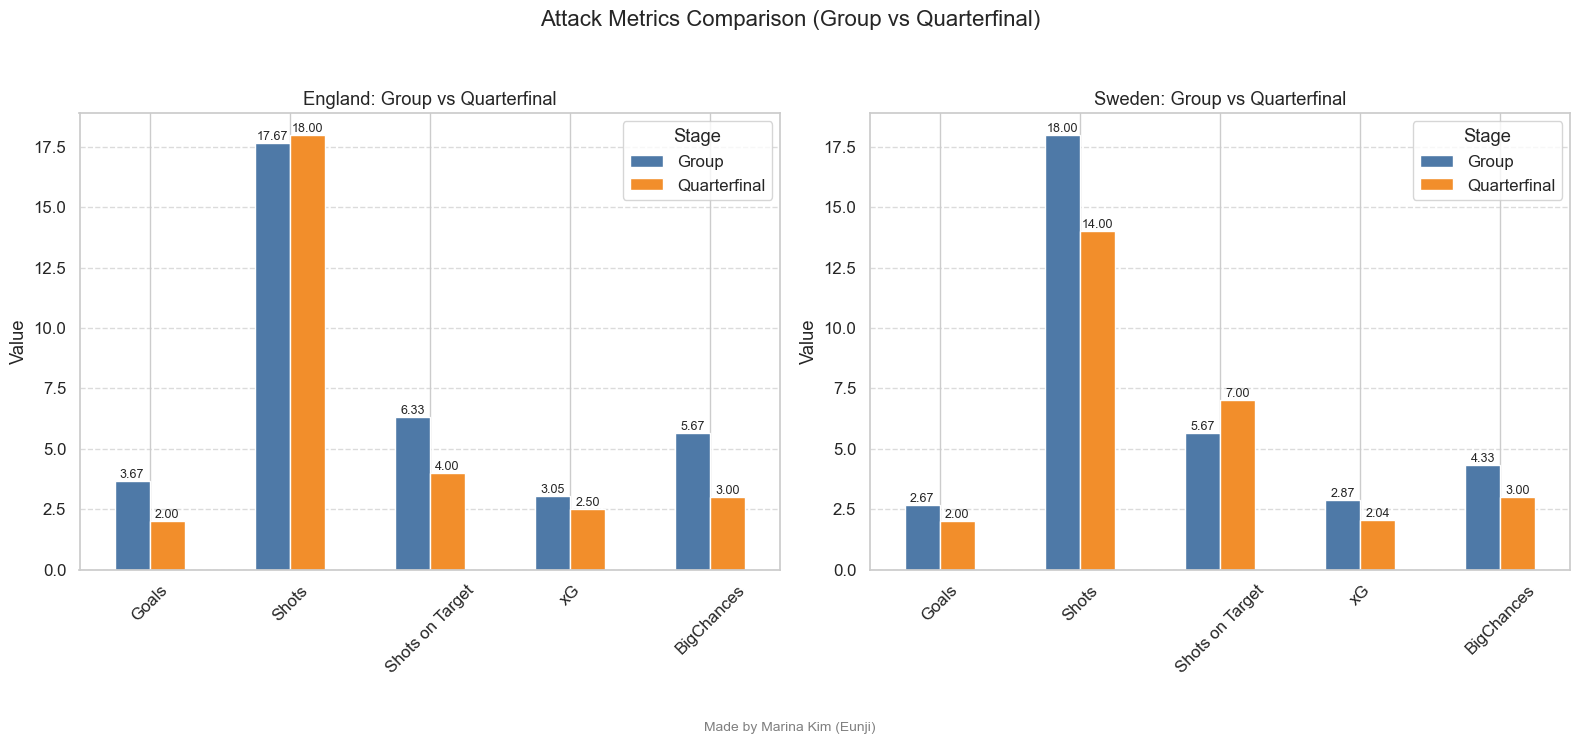

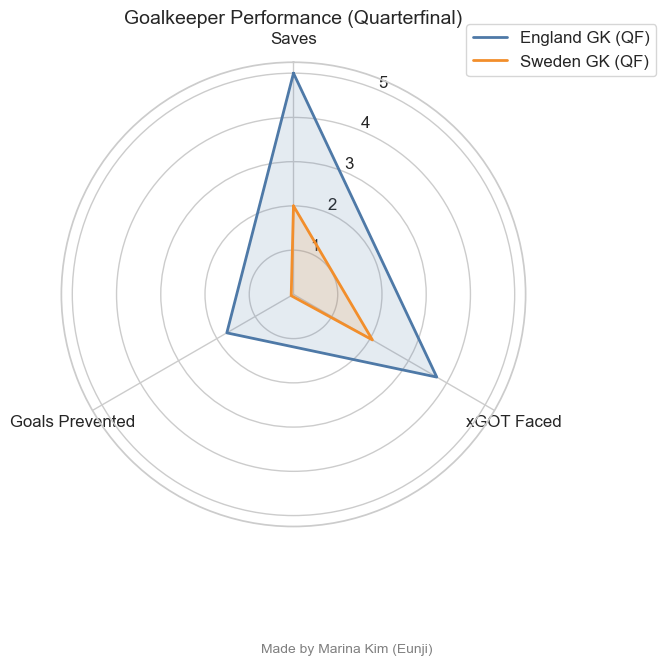

✅ Data Source: Flashscore | Made by Marina Kim (Eunji)


In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ---------------------
# 1. 데이터 로드
# ---------------------
df = pd.read_csv("den_eng.csv")
df['Label'] = df['Team'] + ' (' + df['Stage'] + ')'

# 한글 폰트 옵션
plt.rcParams['font.family'] = 'Arial'
sns.set(style="whitegrid", font_scale=1.1)

# ---------------------
# 2. 데이터 분리 (잉글랜드, 스웨덴)
# ---------------------
eng = df[df['Team'] == 'England']
swe = df[df['Team'] == 'Sweden']

# 분석 지표
attack_cols = ['Goals', 'Shots', 'Shots on Target', 'xG', 'BigChances']
defense_cols = ['Possession', 'Passes', 'Fouls', 'Tackles', 'Clearances', 'Interceptions']

# ---------------------
# 3. Figure 생성 (잉글랜드 vs 스웨덴)
# ---------------------
fig, axes = plt.subplots(1, 2, figsize=(16, 7), sharey=False)
colors = ['#4E79A7', '#F28E2B']

# 잉글랜드 그래프
eng_attack = eng[attack_cols].T
eng_attack.columns = ['Group', 'Quarterfinal']
eng_attack.plot(kind='bar', ax=axes[0], color=colors)
axes[0].set_title('England: Group vs Quarterfinal')
axes[0].set_ylabel('Value')
axes[0].legend(title='Stage')
axes[0].set_xticklabels(attack_cols, rotation=45)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# 값 표시
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height():.2f}',
                     (p.get_x() + p.get_width()/2., p.get_height()),
                     ha='center', va='bottom', fontsize=9)

# 스웨덴 그래프
swe_attack = swe[attack_cols].T
swe_attack.columns = ['Group', 'Quarterfinal']
swe_attack.plot(kind='bar', ax=axes[1], color=colors)
axes[1].set_title('Sweden: Group vs Quarterfinal')
axes[1].set_ylabel('Value')
axes[1].legend(title='Stage')
axes[1].set_xticklabels(attack_cols, rotation=45)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# 값 표시
for p in axes[1].patches:
    axes[1].annotate(f'{p.get_height():.2f}',
                     (p.get_x() + p.get_width()/2., p.get_height()),
                     ha='center', va='bottom', fontsize=9)

plt.suptitle('Attack Metrics Comparison (Group vs Quarterfinal)', fontsize=16)
plt.figtext(0.5, -0.05, 'Made by Marina Kim (Eunji)', ha='center', fontsize=10, color='gray')
plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.savefig("swe_eng.png", bbox_inches='tight')  # 저장 부분 추가
plt.show()

# ---------------------
# 4. 골키퍼 퍼포먼스 레이더 차트
# ---------------------
keeper_cols = ['Saves', 'xGOT Faced', 'Goals Prevented']

# 8강 데이터만 추출
df_qf = df[df['Stage'] == 'Quarterfinal'].set_index('Team')
df_qf_keeper = df_qf[keeper_cols]

labels = keeper_cols
num_vars = len(labels)
angles = np.linspace(0, 2*np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

fig = plt.figure(figsize=(7,7))
ax = plt.subplot(111, polar=True)

# 잉글랜드
eng_values = df_qf_keeper.loc['England'].tolist()
eng_values += eng_values[:1]
ax.plot(angles, eng_values, linewidth=2, label='England GK (QF)', color='#4E79A7')
ax.fill(angles, eng_values, alpha=0.15, color='#4E79A7')

# 스웨덴
swe_values = df_qf_keeper.loc['Sweden'].tolist()
swe_values += swe_values[:1]
ax.plot(angles, swe_values, linewidth=2, label='Sweden GK (QF)', color='#F28E2B')
ax.fill(angles, swe_values, alpha=0.15, color='#F28E2B')

# 레이더 설정
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles[:-1]), labels)
plt.title('Goalkeeper Performance (Quarterfinal)', fontsize=14)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.figtext(0.5, -0.05, 'Made by Marina Kim (Eunji)', ha='center', fontsize=10, color='gray')
plt.tight_layout()

plt.savefig("goalkeeper_swe_eng.png", bbox_inches='tight')  # 저장 부분 추가
plt.show()

print("✅ Data Source: Flashscore | Made by Marina Kim (Eunji)")
